<a href="https://colab.research.google.com/github/alvarischa/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Clustering**

```
Cluster analysis or clustering is the task of grouping a set of objects in such 
a way that objects in the same group (called a cluster) are more similar (in 
some sense) to each other than to those in other groups (clusters).


Here we model the clustering from customer income and spend data. We use this 
model to perform customer segmentation. We differentiate customers into the 
optimum number of groups based on their shared income and spend.

```



In [125]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data Set**

In [126]:
# Import Dataset
df_income = pd.read_csv('https://raw.githubusercontent.com/alvarischa/Clustering/main/Mall_Customers.csv')
df_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


```
Kemudian cek tipe setiap data

Data object merupakan data kategorik, data integer adalah tipe data yang terdiri dari angka bulat, dan 
data float adalah tipe data untuk angka pecahan.
```



In [127]:
# Prints the Dataset Information
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB




```
Descriptive Statistic

Pada proses ini akan diketahui jumlah data, nilai mean, standar deviasi, nilai minimum, kuartil 1, 
kuartil 2, kuartil 3, dan nilai maksimum dari setiap atribut.
```



In [128]:
# Prints Descriptive Statistics
df_income.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [100]:
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_income[['Gender']]))
df_encoded.columns = encoder.get_feature_names(['Gender'])

# Replace Categotical Data with Encoded Data
df_income.drop(['Gender'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_income, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0
...,...,...,...,...,...,...
195,196,35,120,79,1.0,0.0
196,197,45,126,28,1.0,0.0
197,198,32,126,74,0.0,1.0
198,199,32,137,18,0.0,1.0


**Data Preprocessing**



```
First, we standardize the data to equalize the range and/or data variability.
Feature standardization makes the values of each feature in the data have 
zero-mean (when subtracting the mean in the numerator) and unit-variance.

```



In [129]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_encoded.columns.tolist()
df_encoded[column_names] = scaler.fit_transform(df_encoded[column_names])
df_encoded.sort_index(inplace=True)
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,1.671450,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,1.688771,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,1.706091,-0.491602,2.917671,-1.250054,-1.128152,1.128152


**Data Visualization**

Text(0, 0.5, 'Annual Spend')

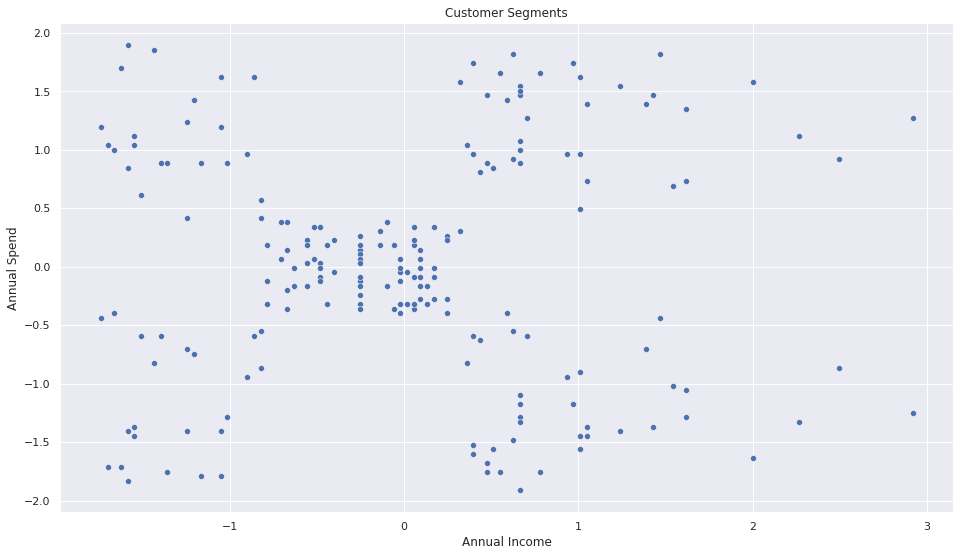

In [130]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

**K-Means Clustering**

`Kmeans algorithm is an iterative algorithm that tries to partition the dataset
into Kpre-defined distinct non-overlapping subgroups (clusters) where each data 
point belongs to only one group. It tries to make the inter-cluster data points
as similar as possible while also keeping the clusters as different (far) as 
possible. It assigns data points to a cluster such that the sum of the squared
distance between the data points and the cluster’s centroid (arithmetic mean 
of all the data points that belong to that cluster) is at the minimum. The 
less variation we have within clusters, the more homogeneous (similar) the 
data points are within the same cluster.`


**Search for the Optimum Number of Clusters (k)**

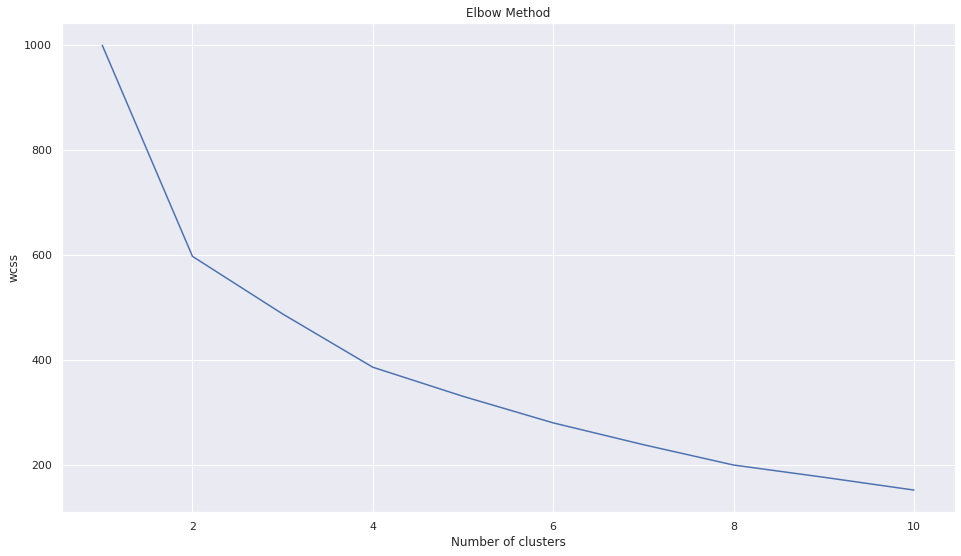

In [132]:
# Transform Data Frame to Numpy Array
income = feature.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [133]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.39644160577705434
For n_clusters=3, The Silhouette Coefficient is 0.36782472313835896
For n_clusters=4, The Silhouette Coefficient is 0.33269643434208473
For n_clusters=5, The Silhouette Coefficient is 0.34571517088794623
For n_clusters=6, The Silhouette Coefficient is 0.36195338805796723
For n_clusters=7, The Silhouette Coefficient is 0.3789276716722634
For n_clusters=8, The Silhouette Coefficient is 0.4016388431945832
For n_clusters=9, The Silhouette Coefficient is 0.41908850438610246
For n_clusters=10, The Silhouette Coefficient is 0.43826087402570013


**Modeling K-Means**

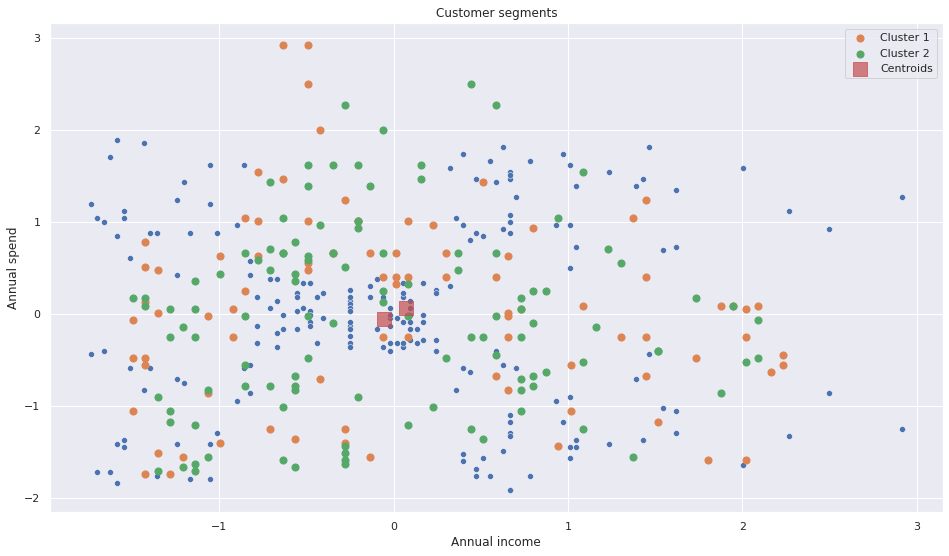

In [134]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=2
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [111]:
# Add Cluster Information to the Raw Data
df_income['cluster'] = cluster
df_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [112]:
# Save= Result
df_income.to_csv('income_clusters.csv', index=False)

# **Hierarchical Clustering**

`Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.`

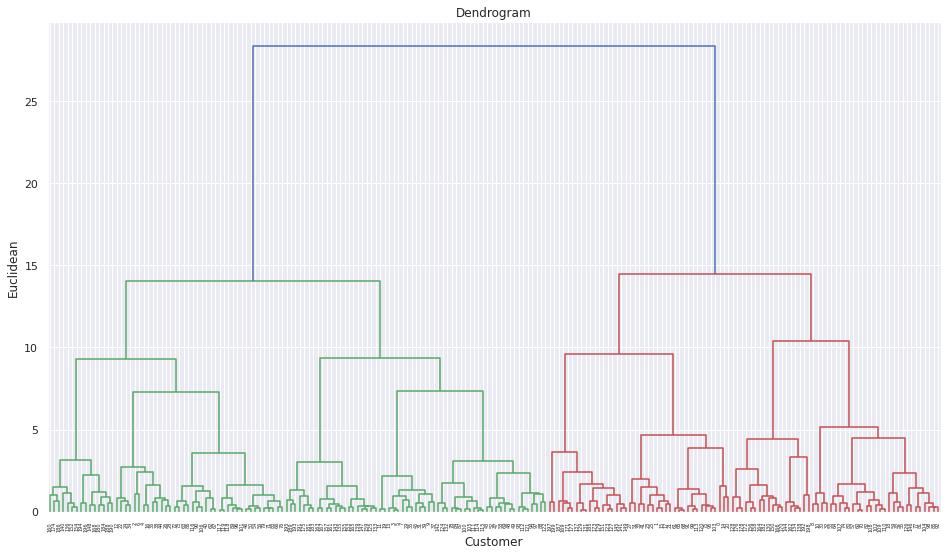

In [113]:

# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

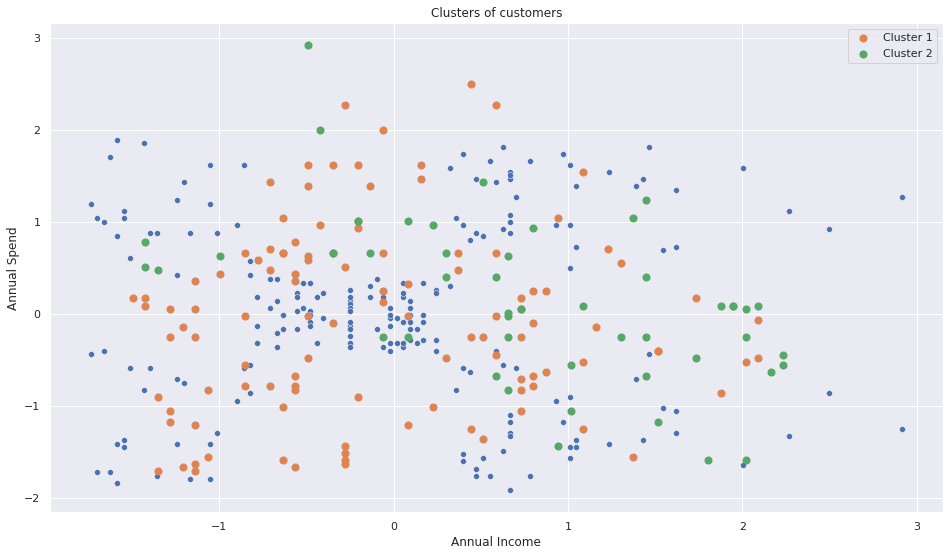

In [117]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()